In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bering = pd.read_excel(filepath, sheet_name='Bering-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Bering)
fp.date_time(Bering)

,Extent,Date
0,320266.650,1979-01-01
1,541778.338,1979-02-01
2,638262.988,1979-03-01
3,423025.159,1979-04-01
4,215587.216,1979-05-01
...,...,...
488,317377.493,2023-05-01
489,39601.476,2023-06-01
490,16935.702,2023-07-01
491,1305.744,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bering['Extent'] = scaler.fit_transform(Bering['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 8
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bering['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((474, 12, 1), (474,))

In [8]:
X_train, y_train = X[:384], y[:384]
X_val, y_val = X[384:432], y[384:432]
X_test, y_test = X[432:], y[432:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bering_model_LT8/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
39/48 [=======================>......] - ETA: 0s - loss: 0.1472 - root_mean_squared_error: 0.3837

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 6s 92ms/step - loss: 0.1389 - root_mean_squared_error: 0.3726 - val_loss: 0.0449 - val_root_mean_squared_error: 0.2119
Epoch 2/50
37/48 [======================>.......] - ETA: 0s - loss: 0.0917 - root_mean_squared_error: 0.3028

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 3s 62ms/step - loss: 0.0939 - root_mean_squared_error: 0.3065 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1986
Epoch 3/50
37/48 [======================>.......] - ETA: 0s - loss: 0.0760 - root_mean_squared_error: 0.2757

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 3s 57ms/step - loss: 0.0762 - root_mean_squared_error: 0.2761 - val_loss: 0.0342 - val_root_mean_squared_error: 0.1849
Epoch 4/50
45/48 [===========================>..] - ETA: 0s - loss: 0.0531 - root_mean_squared_error: 0.2304

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 4s 77ms/step - loss: 0.0566 - root_mean_squared_error: 0.2378 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1747
Epoch 5/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0446 - root_mean_squared_error: 0.2113

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 3s 61ms/step - loss: 0.0453 - root_mean_squared_error: 0.2127 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1662
Epoch 6/50
36/48 [=====================>........] - ETA: 0s - loss: 0.0420 - root_mean_squared_error: 0.2050

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 3s 68ms/step - loss: 0.0394 - root_mean_squared_error: 0.1985 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1605
Epoch 7/50
45/48 [===========================>..] - ETA: 0s - loss: 0.0304 - root_mean_squared_error: 0.1743

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 3s 72ms/step - loss: 0.0300 - root_mean_squared_error: 0.1733 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1579
Epoch 8/50
35/48 [====================>.........] - ETA: 0s - loss: 0.0287 - root_mean_squared_error: 0.1694

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 3s 61ms/step - loss: 0.0265 - root_mean_squared_error: 0.1628 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1568
Epoch 9/50
32/48 [===================>..........] - ETA: 0s - loss: 0.0280 - root_mean_squared_error: 0.1673

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 3s 65ms/step - loss: 0.0269 - root_mean_squared_error: 0.1641 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1548
Epoch 10/50
48/48 [==============================] - ETA: 0s - loss: 0.0223 - root_mean_squared_error: 0.1492

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 3s 71ms/step - loss: 0.0223 - root_mean_squared_error: 0.1492 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1523
Epoch 11/50
43/48 [=========================>....] - ETA: 0s - loss: 0.0230 - root_mean_squared_error: 0.1516

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 3s 68ms/step - loss: 0.0212 - root_mean_squared_error: 0.1457 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1482
Epoch 12/50
34/48 [====================>.........] - ETA: 0s - loss: 0.0236 - root_mean_squared_error: 0.1535

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 3s 72ms/step - loss: 0.0216 - root_mean_squared_error: 0.1469 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1466
Epoch 13/50
44/48 [==========================>...] - ETA: 0s - loss: 0.0192 - root_mean_squared_error: 0.1386

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 3s 66ms/step - loss: 0.0184 - root_mean_squared_error: 0.1358 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1379
Epoch 14/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0183 - root_mean_squared_error: 0.1352 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1628
Epoch 15/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0178 - root_mean_squared_error: 0.1333 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1451
Epoch 16/50
45/48 [===========================>..] - ETA: 0s - loss: 0.0190 - root_mean_squared_error: 0.1377

INFO:tensorflow:Assets written to: Bering_model_LT8\assets


INFO:tensorflow:Assets written to: Bering_model_LT8\assets


48/48 [==============================] - 3s 66ms/step - loss: 0.0182 - root_mean_squared_error: 0.1350 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1327
Epoch 17/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0196 - root_mean_squared_error: 0.1399 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1451
Epoch 18/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0181 - root_mean_squared_error: 0.1345 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1521
Epoch 19/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0151 - root_mean_squared_error: 0.1227 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1564
Epoch 20/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1382
Epoch 21/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0179 - root_mean_squared_error: 0.1339 - val_loss: 0.0274 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

0.9333873192469279 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

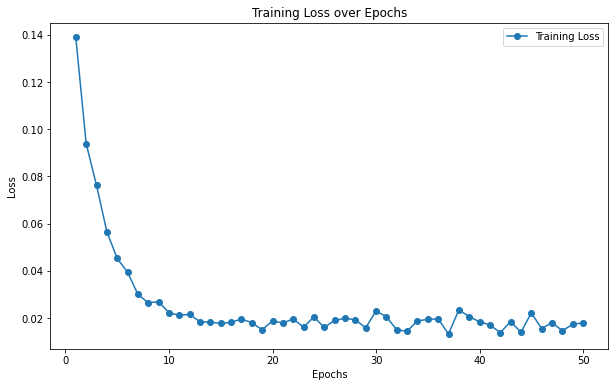

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

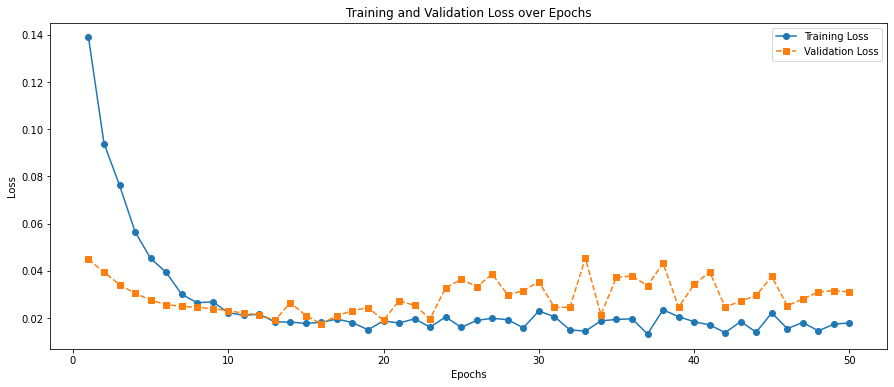

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bering_model_LT8/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.10307467032230616
MAE : 0.07930505840281184


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,549049.437500,466524.938
1,476653.812500,708542.184
2,486208.156250,652598.000
3,303136.156250,414216.785
4,236432.953125,236263.303
5,88090.171875,43422.368
6,105080.148438,2161.744
7,120490.375000,944.181
8,209460.343750,13977.643
9,273412.406250,24795.001


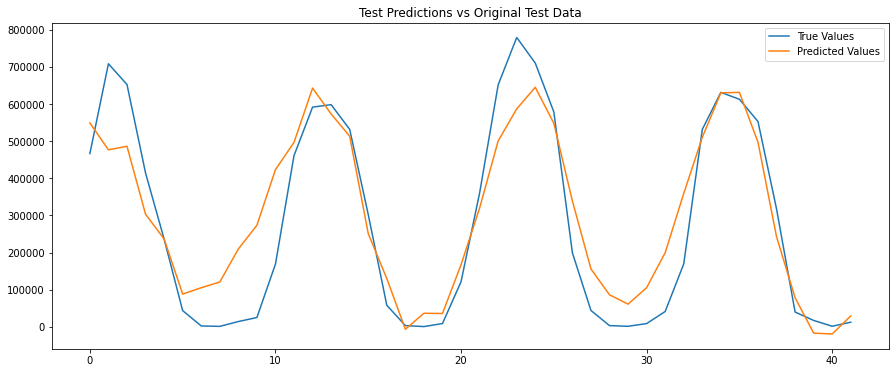

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

15/15 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

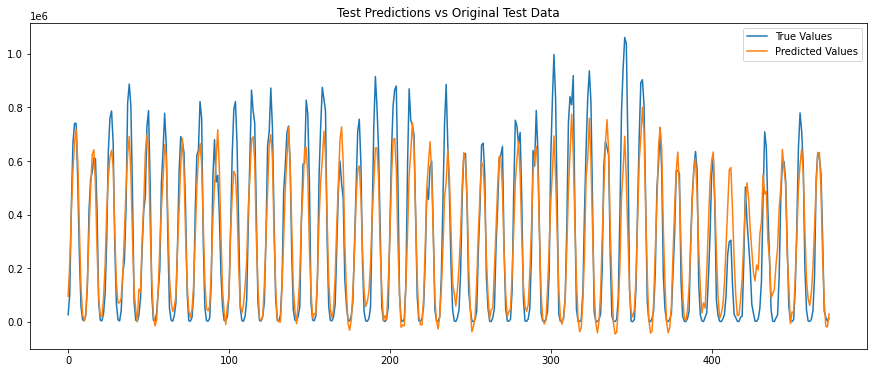

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()